In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as st
import seaborn as sns
import scipy.stats as sts
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
# task 1

t1mean = 70
t1std = 11.35

In [38]:
# 1.1 bill between 80 and 55

t1x1 = 80
t1x2 = 55
zscoreOne = (t1x1 - t1mean) / t1std
zscoreTwo = (t1x2 - t1mean) / t1std

pval80 = norm.cdf(zscoreOne)
pval55 = norm.cdf(zscoreTwo)

t1p = pval80 - pval55
print("Probability of a randomly selected monthly bill between 80 and 55 is", t1p)

Probability of a randomly selected monthly bill between 80 and 55 is 0.7177035479448073


In [39]:
# t1.2 not greater than 40

t1x3 = 40
zscoreThree = (t1x3 - t1mean) / t1std
pval40 = norm.cdf(zscoreThree)

print('Probability of a randomly selected monthly bill being not greater than 40 is', pval40)

Probability of a randomly selected monthly bill being not greater than 40 is 0.004106667373140424


In [40]:
# task 2
# a)

df = pd.read_csv('DS1_C5_S5_SmartCarRiding_Data_Practice.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [69]:
# b)

q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
std = df['fare_amount'].std()
iqr = q3-q1
uf = q3+1.5*iqr
lf = q1-1.5*iqr
mean = df['fare_amount'].mean()
median = df['fare_amount'].median()
mode = df['fare_amount'].mode()[0]
skew = sts.skew(df['fare_amount'])
kurt = sts.kurtosis(df['fare_amount'])
var = df['fare_amount'].var()

detdf = pd.DataFrame([mean, median, mode,std, var, q1, q3, iqr, uf, lf, skew, kurt], index = ['Mean', 'Median','Mode','Standard Deviation', 'Var', 'Q1', 'Q3', 'IQR', 'Upperfence', 'Lowerfence', 'Skewness', 'Kurtosis'])
detdf = detdf.T
detdf.insert(0, '', 'Fare Amount')
df.loc[df["fare_amount"] < lf, "fare_amount"] = mean
df.loc[df["fare_amount"] > uf, "fare_amount"] = mean
detdf

,,Mean,Median,Mode,Var,Q1,Q3,IQR,Upperfence,Lowerfence,Skewness,Kurtosis
0,Fare Amount,8.875867,8.5,11.359955,12.916233,6.0,11.359955,5.359955,19.399888,-2.039933,0.640904,-0.112688


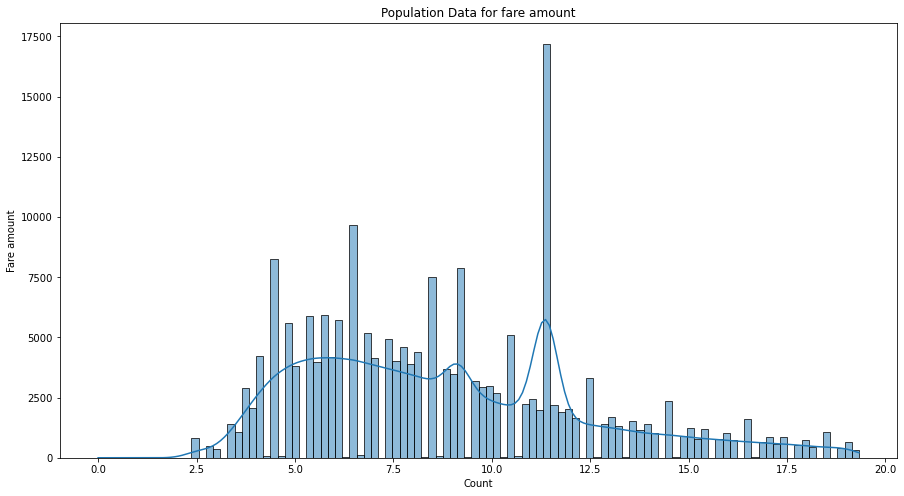

In [49]:
plt.figure(figsize = (15, 8))
sns.histplot(df['fare_amount'], kde = True)
plt.title('Population Data for fare amount')
plt.xlabel('Count')
plt.ylabel('Fare amount');

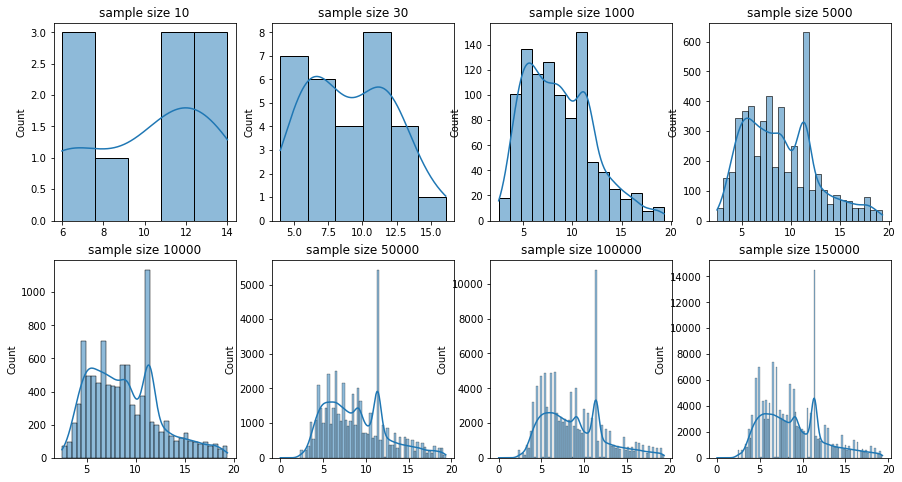

In [50]:
# c)

num = [10, 30, 1000, 5000, 10000, 50000, 100000, 150000]
data_s = []
data_smean = []
sample_df = pd.DataFrame()
k = 0



for i in num:
    sample_df = df.sample(i, replace = True, ignore_index = True, random_state = 1)
    data_s.append(sample_df['fare_amount'].tolist())
    data_smean.append(sample_df['fare_amount'].mean())
    
    
fig, ax = plt.subplots(2, 4, figsize = (15, 8))

for i in range(0, 2): # row
    for j in range(0, 4): # column
       # ax[i, j].hist(data_s[k], bins = 5, density = True)
        sns.histplot(data_s[k], ax = ax[i,j], kde = True)
        ax[i, j].set_title(label = 'sample size ' + str(len(data_s[k])))
        k+=1

In [81]:
# d)

sam1 = pd.DataFrame()

for i in range(0, 20):
    sample_20 = pd.DataFrame(df[['fare_amount']].sample(400, replace = True, ignore_index = True))
    sam1.insert(i, 'Sample_' + str(i), sample_20)
    
sam1

,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,Sample_11,Sample_12,Sample_13,Sample_14,Sample_15,Sample_16,Sample_17,Sample_18,Sample_19
0,8.000000,16.100000,11.359955,13.500000,11.359955,6.100000,6.100000,6.0,6.100000,17.500000,16.500000,8.500000,12.100000,16.500000,7.7,8.500000,6.9,9.147804,6.000000,11.3
1,5.300000,5.700000,9.147804,12.900000,7.300000,10.500000,6.900000,18.5,7.300000,5.500000,5.000000,11.359955,5.700000,11.359955,7.0,9.147804,7.3,14.900000,15.000000,11.3
2,4.500000,4.900000,13.000000,6.900000,11.500000,11.359955,14.900000,11.0,4.900000,12.500000,6.500000,6.100000,6.000000,6.500000,10.9,10.500000,11.0,11.000000,6.500000,7.0
3,17.300000,7.400000,8.500000,10.000000,7.700000,9.147804,5.000000,4.1,9.000000,4.900000,5.700000,13.000000,5.700000,15.500000,5.0,6.100000,6.5,11.359955,7.000000,12.1
4,11.359955,7.500000,11.359955,11.359955,9.500000,9.147804,5.700000,7.0,10.500000,11.359955,4.100000,12.100000,11.359955,5.300000,4.0,6.100000,7.5,12.900000,4.900000,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,7.500000,13.500000,6.500000,10.000000,8.100000,12.100000,7.300000,19.3,9.147804,11.359955,11.359955,6.100000,4.000000,11.359955,10.9,11.700000,6.1,14.000000,12.000000,16.9
396,16.100000,11.000000,6.100000,8.500000,11.359955,9.500000,11.359955,8.1,4.100000,6.900000,10.000000,4.100000,14.100000,11.500000,7.0,11.359955,6.9,7.500000,11.359955,12.9
397,4.000000,9.300000,8.500000,5.700000,9.300000,12.900000,5.000000,6.1,8.500000,17.500000,11.359955,5.500000,5.700000,14.000000,4.9,15.000000,8.5,10.100000,11.359955,12.9
398,12.500000,11.359955,5.700000,11.700000,13.000000,13.300000,14.500000,9.7,8.500000,6.900000,9.000000,5.300000,5.500000,15.000000,5.7,8.100000,8.5,3.700000,11.359955,6.9


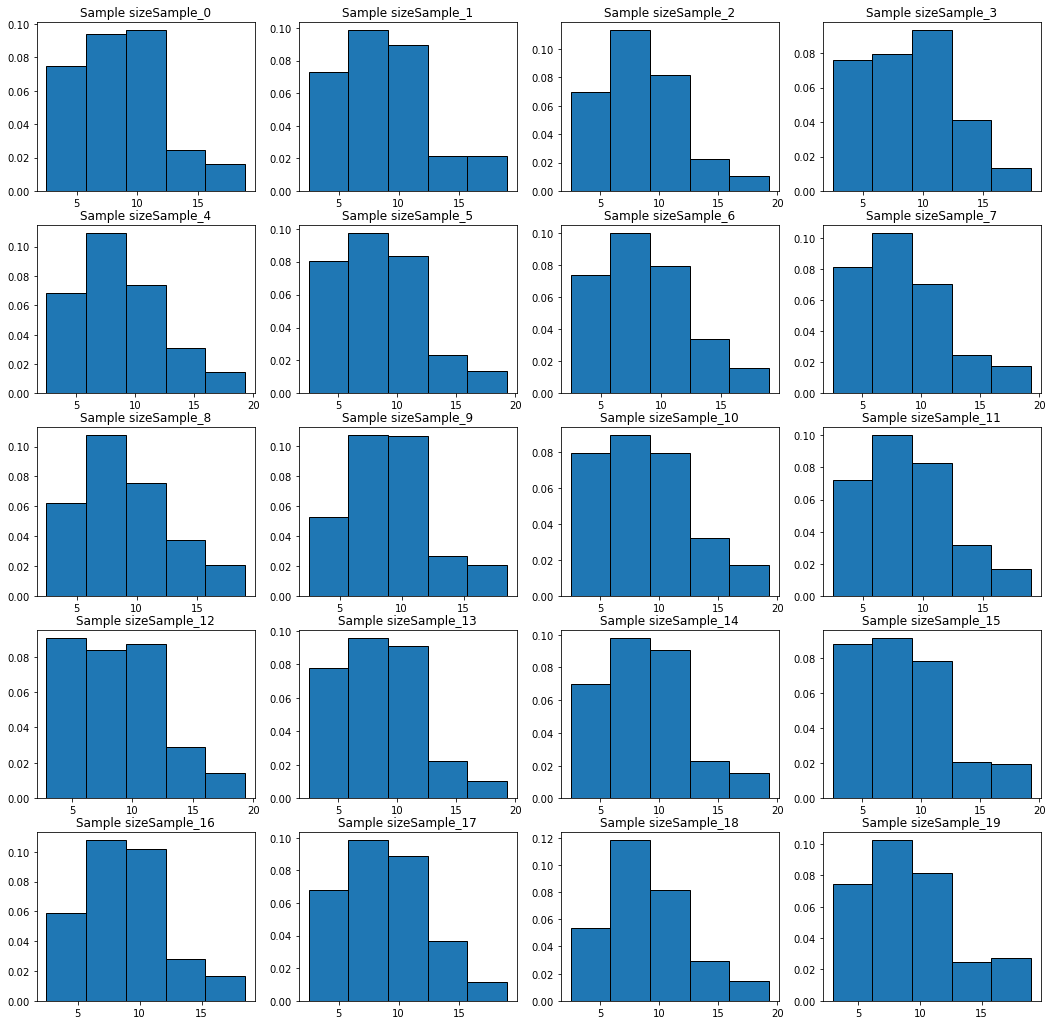

In [82]:
samname = sam1.columns
fig, ax = plt.subplots(5, 4, figsize = (18, 18))
k = 0

for i in range(0, 5):
    for j in range(0, 4):
        ax[i, j].hist(sam1[samname[k]], bins =  5, density = True, edgecolor = 'black')
        ax[i, j].set_title(label = 'Sample size' + samname[k])
        k+=1

In [83]:
sameans = []

for i in samname:
    sameans.append(sam1[i].mean())
    
sameansdf = pd.DataFrame({'Sample names': samname, 'Sample means': sameans})
sameansdf

,Sample names,Sample means
0,Sample_0,8.805401
1,Sample_1,8.907361
2,Sample_2,8.626572
3,Sample_3,9.083733
4,Sample_4,8.903122
5,Sample_5,8.607994
6,Sample_6,8.792853
7,Sample_7,8.689742
8,Sample_8,9.099925
9,Sample_9,9.041490


In [107]:
finsammean = sameansdf['Sample means'].mean()
finsammed =  sameansdf['Sample means'].median()
finsammode =  sameansdf['Sample means'].mode()[0]
finsamstd =  st.stdev(sameansdf['Sample means'])
finsamvar =  sameansdf['Sample means'].var()
finsamrange =  sameansdf['Sample means'].max() -  sameansdf['Sample means'].min()
finsamq1 =  sameansdf['Sample means'].quantile(0.25)
finsamq3 =  sameansdf['Sample means'].quantile(0.75)
finsamiqr = finsamq3 - finsamq1
finsamlf = finsamq1 - 1.5 * finsamiqr
finsamuf = finsamq3 + 1.5 * finsamiqr
finsamskew = sts.skew( sameansdf['Sample means'])
finsamkurt = sts.kurtosis( sameansdf['Sample means'])


#detdf = pd.DataFrame([mean, median, mode, var, q1, q3, iqr, uf, lf, skew, kurt], index = ['Mean', 'Median','Mode', 'Var', 'Q1', 'Q3', 'IQR', 'Upperfence', 'Lowerfence', 'Skewness', 'Kurtosis'])
sammm = pd.DataFrame([finsammean, finsammed, finsammode, finsamstd, finsamvar, finsamq1, finsamq3, finsamiqr, finsamuf, finsamlf, finsamskew, finsamkurt], index = ['Mean', 'Median','Mode', 'Standard Deviation', 'Var', 'Q1', 'Q3', 'IQR', 'Upperfence', 'Lowerfence', 'Skewness', 'Kurtosis'])
sammm = sammm.T
sammm.insert(0, '', 'Sampled Data')
finaldf = sammm.append(detdf)
print('Sample std = ', st.stdev(df.fare_amount)/np.sqrt(400))
finaldf

Sample std =  0.17969580419066683


,,Mean,Median,Mode,Standard Deviation,Var,Q1,Q3,IQR,Upperfence,Lowerfence,Skewness,Kurtosis
0,Sampled Data,8.881363,8.889355,8.607994,0.187123,0.035015,8.762911,9.004217,0.241306,9.366177,8.400951,0.309894,-0.590336
0,Fare Amount,8.875867,8.500000,11.359955,NaN,12.916233,6.000000,11.359955,5.359955,19.399888,-2.039933,0.640904,-0.112688


We can see that the mean of population data and mean of 20 samples (n=200) is very close.
We can also see that the standard deviation of population and sampled data is also very close, hence, we can say that the samples follow central limit theorem